# Simple pendulum using Lagrange's equation

Defines a Lagrangian Gravitational Two Body Orbit class that is used to generate basic orbits plots from solving Lagrange's equations.

* Last revised April-17-2019 by Nick Kyriacou (kyriacou.2@osu.edu).

## Euler-Lagrange equation

For a simple pendulum, the Lagrangian with generalized coordinate $x_1$ , $y_1$ ,$x_2$ , and $y_2$ is

$\begin{align}
  \mathcal{L} = \frac12 m_1 ( \dot x_1^2 + \dot y_1^2 ) + \frac12 m_2 ( \dot x_2^2 + \dot y_2^2 ) +  \frac{G m_1 m_2}{r}
\end{align}$

Where r is defined as

$\begin{align}
  \mathcal{r} = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}
\end{align}$

The Euler-Lagrange relation gives a system of 4 equations which are given below

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot x_1} = \frac{\partial\mathcal L}{\partial x_1}
 \quad\Longrightarrow\quad
 m_1 \ddot x_1 =  \frac{-G m_1 m_2 (x_1 - x_2)}{r^3}
\end{align}$

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot y_1} = \frac{\partial\mathcal L}{\partial y_1}
 \quad\Longrightarrow\quad
 m_1 \ddot y_1 =  \frac{-G m_1 m_2 (y_1 - y_2)}{r^3}
\end{align}$

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot x_2} = \frac{\partial\mathcal L}{\partial x_2}
 \quad\Longrightarrow\quad
 m_2 \ddot  x_2 =  \frac{-G m_1 m_2 (x_2 - x_1)}{r^3}
\end{align}$

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot y_2} = \frac{\partial\mathcal L}{\partial y_2}
 \quad\Longrightarrow\quad
 m_2 \ddot  y_2 =  \frac{-G m_1 m_2 (y_2 - y_1)}{r^3}
\end{align}$

In [60]:
%matplotlib inline

In [61]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

In [62]:
# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 10
plt.rcParams.update({'font.size': font_size})

## Pendulum class and utility functions

In [63]:
class LagrangianTwoBody():
    """
    LangrangianTwoBody class implements the parameters and Lagranges's equations for 
     a two body Orbit Problem.
     
    Parameters
    ----------
    m_1 and m_2: float
        masses of each gravitational body
    G : float
        Newton's gravitational constant

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, G, m_1, m_2
                ):
        self.G = G
        self.m_1 = m_1
        self.m_2 = m_2
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dx_1/dt, d^2x_1/dt^2,dy_1/dt, d^2y_1/dt^2,dx_2/dt, d^2x_2/dt^2,dy_2/dt, d^2y_2/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            An 8-component vector with y[0] = x_1(t), y[1] = dx_1/dt, y[2] = y_1(t), y[3] = dy_1/dt
                                       y[4] = x_2(t), y[5] = dx_2/dt, y[6] = y_2(t), y[7] = dy_2/dt
            
        Returns
        -------
        
        """
        c_1 = self.m_1*self.G
        c_2 = self.m_2*self.G
        r = np.sqrt( (y[0]-y[4])**2 + (y[2]-y[6])**2 )
        return [y[1],-c_2*(y[0] -y[4])/r**3 ,y[3],-c_2*(y[2] -y[6])/r**3,y[5],-c_1*(y[4] -y[0])/r**3,y[7],-c_1*(y[6] -y[2])/r**3]
    
    def solve_ode(self, t_pts,x_1_0, x_dot_1_0,y_1_0, y_dot_1_0,x_2_0, x_dot_2_0,y_2_0, y_dot_2_0, 
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [x_1_0, x_dot_1_0,y_1_0, y_dot_1_0,x_2_0, x_dot_2_0,y_2_0, y_dot_2_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        x_1, x_1_dot,y_1,y_1_dot,x_2,x_2_dot,y_2,y_2_dot = solution.y

        return x_1, x_1_dot,y_1,y_1_dot,x_2,x_2_dot,y_2,y_2_dot

In [64]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [65]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Make simple pendulum plots 

In [66]:
# Labels for individual plot axes
x_vs_y_labels = (r'$x$', r'$y$')


# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 100.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  
#Initializes parameters of our system
G = 1.
m_1 = 1.
m_2 = 1.

# Instantiate an Orbit 
orbit1 = LagrangianTwoBody(G=G, m_1=m_1,m_2 = m_2)


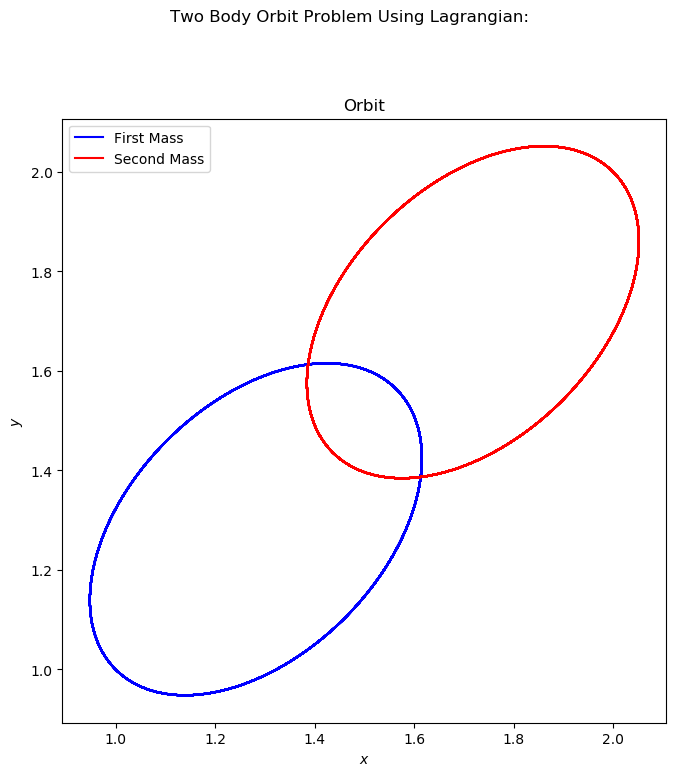

In [67]:
# both plots: same initial conditions
x_1_0 = 1.
x_dot_1_0 = .2
y_1_0 = 1.
y_dot_1_0 = -.2
x_2_0 = 2.
x_dot_2_0 = -(m_1/m_2)*x_dot_1_0
y_2_0 = 2.
y_dot_2_0 = -(m_1/m_2)*y_dot_1_0
x_1, x_1_dot,y_1,y_1_dot,x_2,x_2_dot,y_2,y_2_dot = orbit1.solve_ode(t_pts, x_1_0, x_dot_1_0,y_1_0, y_dot_1_0,x_2_0, x_dot_2_0,y_2_0, y_dot_2_0)


# start the plot!
fig = plt.figure(figsize=(8,8))
overall_title = 'Two Body Orbit Problem Using Lagrangian:  ' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: First body orbit plot 
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x_1[start : stop], y_1[start : stop], 
            axis_labels=x_vs_y_labels, 
            color='blue',
            label='First Mass', 
            title='Orbit', 
            ax=ax_a)    
                              
# second plot: second body orbit  plot                 

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x_2[start : stop], y_2[start : stop], 
            axis_labels=x_vs_y_labels, 
            color='red',
            label='Second Mass', 
            title='Orbit', 
            ax=ax_a)    

ax_a.set_aspect(1)

Now let us choose one mass much heavier than the other and we are in the rest frame so that the orbit reduces to that discussed in class.

In [68]:
#We must ensure we are in the rest frame.
m_1 = 1000.
m_2 = 1.
x_1_0 = 1.
x_dot_1_0 = .02
y_1_0 = 1.
y_dot_1_0 = -.02
x_2_0 = 2.
x_dot_2_0 = -(m_1/m_2)*x_dot_1_0
y_2_0 = 2.
y_dot_2_0 = -(m_1/m_2)*y_dot_1_0
#Reinstantiate a second orbit
orbit2 = LagrangianTwoBody(G=G, m_1=m_1,m_2 = m_2)
x_1, x_1_dot,y_1,y_1_dot,x_2,x_2_dot,y_2,y_2_dot = orbit2.solve_ode(t_pts, x_1_0, x_dot_1_0,y_1_0, y_dot_1_0,x_2_0, x_dot_2_0,y_2_0, y_dot_2_0)


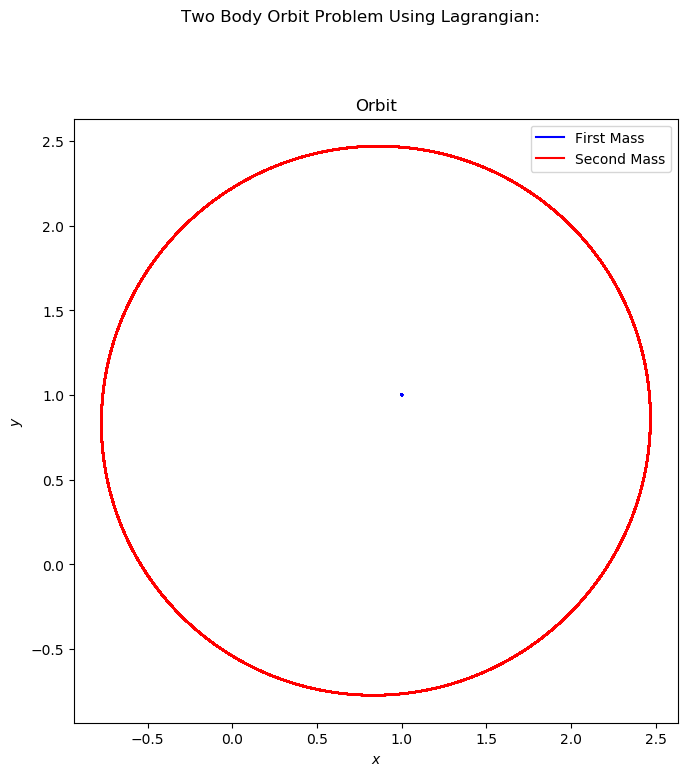

In [69]:
# start the plot!
fig = plt.figure(figsize=(8,8))
overall_title = 'Two Body Orbit Problem Using Lagrangian:  ' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: First body orbit plot 
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x_1[start : stop], y_1[start : stop], 
            axis_labels=x_vs_y_labels, 
            color='blue',
            label='First Mass', 
            title='Orbit', 
            ax=ax_a)    
                              
# second plot: second body orbit  plot                 

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x_2[start : stop], y_2[start : stop], 
            axis_labels=x_vs_y_labels, 
            color='red',
            label='Second Mass', 
            title='Orbit', 
            ax=ax_a)   
ax_a.set_aspect(1)